<a href="https://colab.research.google.com/github/sayantaniguha/AI-Enabled-B2B-FINTECH-Management/blob/master/ML%20Model/Dumping/SAGNIK_GHOSH_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Payment Date Prediction


### Importing related Libraries

In [29]:
#IMPORTING THE REQUIRED LIBRARIES
import datetime as dt
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

### Store the dataset into the Dataframe


In [3]:
#importing given dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

Saving dataset.csv to dataset.csv


### Check the shape of the dataframe


In [4]:
# Finding shape of dataset
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
#Getting the percentage of NULL values in each column
df.isnull().sum() / df.shape[0] * 100

,0
business_code,0.000
cust_number,0.000
name_customer,0.000
clear_date,20.000
buisness_year,0.000
doc_id,0.000
posting_date,0.000
document_create_date,0.000
document_create_date.1,0.000
due_in_date,0.000


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [10]:
#While displaying we can see that many columns are similar
df[["invoice_id", "doc_id"]]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [11]:
display(df[['baseline_create_date',"document_create_date",'document_create_date.1']].corr())

# We can see that the values in the corellation matrix is very high thus signifying high positve correlation, we need to drop these columns as well.

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


#### Please check, Column 'posting_id' is constant columns or not


In [12]:
df["posting_id"].nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [13]:
#We see that that isOpen column is of binary value which tells if the payment is processed or not.
#We can also extrapolate that data from the payment date column as well, as those with null value signify unpaid payment.
#thus this column can se said to be redundant and can be dropped.
df["isOpen"].nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type'
- 'document_create_date.1

In [14]:
cols = ["area_business", "posting_id", "invoice_id", "document_create_date", "isOpen", "document type","document_create_date.1"]
df.drop(cols, axis=1, inplace=True)

### Please check from the dataframe whether all the columns are removed or not

In [15]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [16]:
#Showing all the duplicate rows that are present in the dataframe
df[df.duplicated(keep='first')]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [17]:
df.duplicated().sum()

np.int64(1161)

### Drop all the Duplicate Rows

In [18]:
#Dropping all the duplicate rows that are present in the dataframe while keeping only the first copy
df.drop_duplicates(keep='first', inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [19]:
#Now we can be assured that there is not duplicate column in the dataframe.
df.duplicated().sum()

np.int64(0)

### Check for the number of Rows and Columns in your dataset

In [20]:
# Rechecking the shape of the dataset after dropping duplicates
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [21]:
df.isnull().sum()

,0
business_code,0
cust_number,0
name_customer,0
clear_date,9681
buisness_year,0
doc_id,0
posting_date,0
due_in_date,0
invoice_currency,0
total_open_amount,0


# Data type Conversion

### Please check the data type of each column of the dataframe

In [22]:
df.dtypes

,0
business_code,object
cust_number,object
name_customer,object
clear_date,object
buisness_year,float64
doc_id,float64
posting_date,object
due_in_date,float64
invoice_currency,object
total_open_amount,float64


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date
- baseline_create_date

In [23]:
df[["clear_date", "posting_date", "due_in_date", "baseline_create_date"]].dtypes

,0
clear_date,object
posting_date,object
due_in_date,float64
baseline_create_date,float64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [24]:
#This works by first converting the float vaule to int and then using string slicing to get year month and day which is returned as a datetime object

def date_format(date):
    x = str(date)
    year = int(x[0:4])
    month = int(x[4:6])
    day = int(x[6:])
    return dt.datetime(year, month, day)


# Down-casting date columns from float to int
df['buisness_year'] = pd.to_numeric(df['buisness_year'], downcast='integer')
df['due_in_date'] = pd.to_numeric(df['due_in_date'], downcast='integer')
df['baseline_create_date'] = pd.to_numeric(df['baseline_create_date'], downcast='integer')

# Applying the date formatter
df['due_in_date'] = df['due_in_date'].apply(date_format)
df['baseline_create_date'] = df['baseline_create_date'].apply(date_format)

# Converting object type to datetime format
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])

# Printing the head of the df
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4


### Please check the datatype of all the columns after conversion of the above 4 columns

In [25]:
#We have successfully converted all the datatypes to datetime objects
df[["clear_date", "posting_date", "due_in_date", "baseline_create_date"]].dtypes

,0
clear_date,datetime64[ns]
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency

In [26]:
df["invoice_currency"].value_counts()

,count
invoice_currency,
USD,45011
CAD,3828


#### display the "total_open_amount" column value

In [27]:
df["total_open_amount"]

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
#Multiplying with 0.7 to get the value in USD for the respective columns
df['converted_usd'] = np.where(df['invoice_currency'] == 'CAD', df['total_open_amount'] * 0.7, df['total_open_amount'])

### Display the new "converted_usd" column values

In [31]:
df[['converted_usd']]

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record

- Note -  use "buisness_year" column for this

In [32]:
df["buisness_year"].value_counts()

,count
buisness_year,
2019,33975
2020,14864


### Write the code to delete the following columns

- 'invoice_currency'
- 'total_open_amount',

In [33]:
df.drop(['invoice_currency', 'total_open_amount'], axis=1, inplace=True)

### Write a code to check the number of columns in dataframe

In [34]:
print(df.columns)
print("No. of columns: ", len(df.columns))

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')
No. of columns:  11


# Splitting the Dataset

### Look for all columns containing null value

- Note - Output expected is only one column

In [35]:
#Only one column with null value is displayed that being clear_date
df.columns[df.isna().any()]

Index(['clear_date'], dtype='object')

#### Find out the number of null values from the column that you got from the above code

In [36]:
df['clear_date'].isna().sum()

np.int64(9681)

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset )
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset )

In [37]:
nulldata = df.loc[df['clear_date'].isnull()]
maindata = df.loc[~df['clear_date'].isnull()]
maindata = maindata.reset_index(drop=True)

### Check the number of Rows and Columns for both the dataframes

In [38]:
#shape of dataset containing 'clear_date'
maindata.shape

(39158, 11)

In [39]:
#shape of dataset containing NULL cells
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [40]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
4,CA02,0140106181,THE corporation,2019-12-04,2019,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [41]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date"
- Formula - Delay = clear_date - due_in_date

In [42]:
maindata["Delay"] = maindata["clear_date"] - maindata["due_in_date"]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [43]:
temp = pd.DataFrame(maindata.groupby('name_customer')['Delay'].mean(numeric_only=False))
temp.rename(columns={'Delay': 'avg_Delay'}, inplace=True)
temp

,avg_Delay
name_customer,
11078 us,17 days 00:00:00
17135 associates,-10 days +00:00:00
17135 llc,-3 days +00:00:00
236008 associates,-3 days +00:00:00
99 CE,2 days 00:00:00
...,...
YEN BROS corp,0 days 00:00:00
YEN BROS corporation,-1 days +12:00:00
YEN BROS llc,-2 days +00:00:00


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [44]:
maindata["avg_delay"] = maindata["name_customer"].map(temp['avg_Delay'])

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [45]:
maindata["avg_delay"] = maindata["avg_delay"] / np.timedelta64(1, 's')
maindata["avg_delay"].head()

,avg_delay
0,-2.334702e+05
1,1.641600e+06
2,6.990545e+05
3,-1.887923e+05
4,6.172800e+06


### Display the maindata dataframe

In [46]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
4,CA02,0140106181,THE corporation,2019-12-04,2019,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe

In [47]:
maindata.drop(['Delay', 'clear_date'], axis=1, inplace=True)
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,0200769623,WAL-MAR corp,2020,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,-2.334702e+05
1,U001,0200980828,BEN E,2019,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1.641600e+06
2,U001,0200792734,MDV/ trust,2019,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,6.990545e+05
3,U001,0200769623,WAL-MAR foundation,2019,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-1.887923e+05
4,CA02,0140106181,THE corporation,2019,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,6.172800e+06


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [48]:
X = maindata.drop(['avg_delay'], axis=1)

In [49]:
y = maindata.iloc[:,-1:]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format

In [50]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4, random_state=30)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [51]:
print(X_train.shape)
print(X_loc_test.shape)
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494, 1)
(15664, 1)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [52]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=30)

### Please check for the number of rows and columns of all the 4 dataframes

In [53]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832, 1)
(7832, 1)


# Exploratory Data Analysis (EDA)

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable

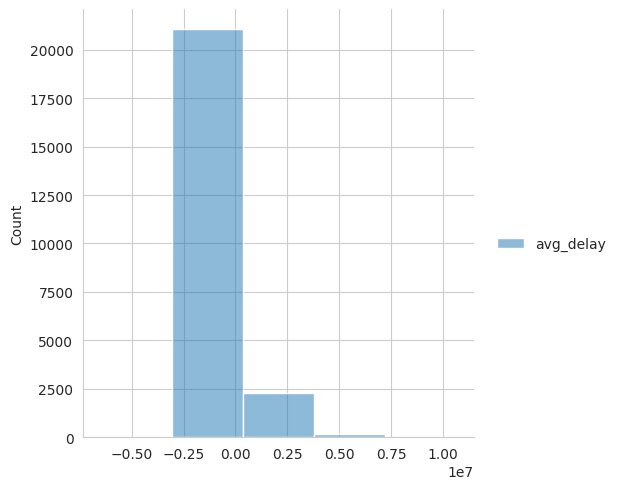

In [54]:
#bar plot
sns.set_style('whitegrid')
sns.displot(data=y_train, kde=False, bins=5)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [55]:
temp_X_train = X_train.groupby(by=["name_customer"], as_index=False)["doc_id"].count()
temp_X_train.head()

,name_customer,doc_id
0,17135 llc,1
1,99 CE,2
2,99 CE associates,1
3,99 CE corporation,1
4,99 CE foundation,1


### You can make another distribution plot of the "doc_id" column from x_train

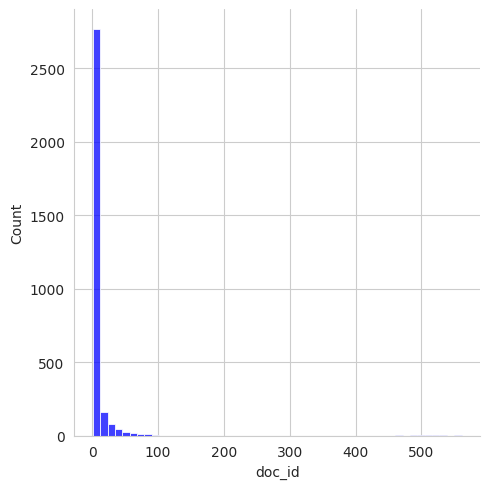

In [56]:
sns.displot(data=temp_X_train, x="doc_id", kde=False, color='blue', bins=50)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


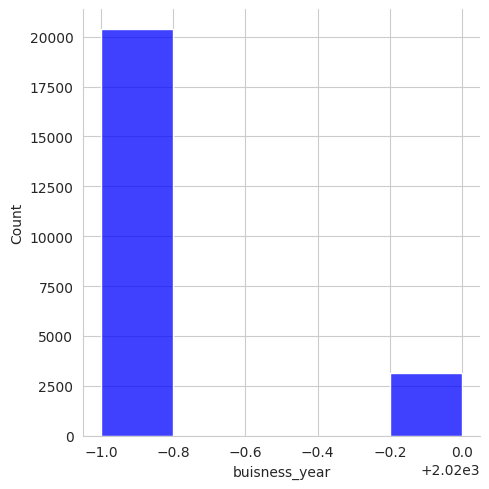

In [57]:
sns.displot(data=X_train, x="buisness_year", kde=False, color='blue', bins=5)

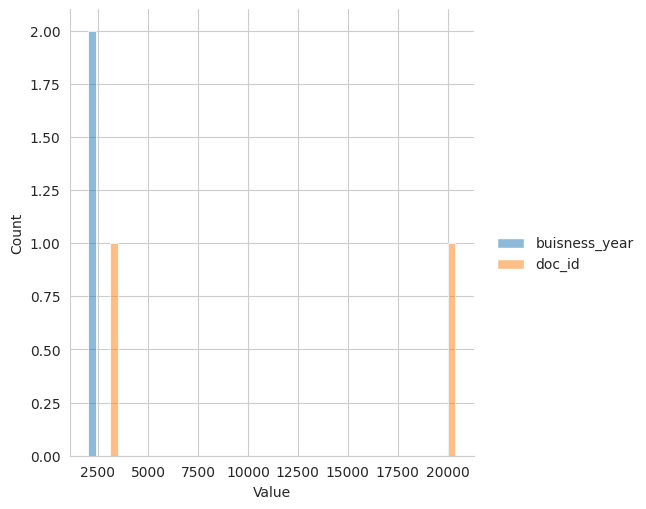

In [58]:
temp2_X_train = X_train.groupby(by=["buisness_year"], as_index=False)["doc_id"].count()
g= sns.displot(data=temp2_X_train, bins = 50)
g.set_axis_labels("Value", "Count")

# Feature Engineering

### Display and describe the X_train dataframe

In [59]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
25168,U001,0200769623,WAL-MAR associates,2019,1.929617e+09,2019-07-13,2019-07-28,2019-07-13,NAH4,17818.85
14819,U001,0200707822,PUBLI in,2019,1.929752e+09,2019-08-15,2019-08-30,2019-08-15,NAA8,99179.89
16355,U001,0200769623,WAL-MAR trust,2019,1.929543e+09,2019-06-27,2019-07-12,2019-06-27,NAH4,57682.64
19540,U001,0200152991,JET associates,2019,1.930221e+09,2019-12-05,2019-12-20,2019-12-05,NAA8,10240.72
6425,CA02,0140106257,KRON trust,2020,2.960615e+09,2020-02-23,2020-03-06,2020-02-25,CA10,2764.09
...,...,...,...,...,...,...,...,...,...,...
30517,U001,0100052024,CPG associates,2019,1.929156e+09,2019-04-16,2019-05-01,2019-04-16,NAA8,16410.40
919,U001,0200777735,NASH co,2019,1.928784e+09,2019-02-12,2019-02-27,2019-02-12,NAA8,140.81
33268,U001,0200943275,US corporation,2019,1.928657e+09,2019-01-21,2019-02-22,2019-01-21,NA32,15300.13
4517,U001,0200794332,COST corporation,2019,1.929673e+09,2019-07-31,2019-08-15,2019-07-31,NAAX,17936.22


In [60]:
X_train.describe()

,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd
count,23494.000000,2.349400e+04,23494,23494,23494,23494.000000
mean,2019.132885,2.014934e+09,2019-07-23 16:01:47.874350848,2019-08-09 21:56:07.702392064,2019-07-23 15:41:08.545160448,30622.827100
min,2019.000000,1.928502e+09,2018-12-30 00:00:00,2018-12-24 00:00:00,2018-12-14 00:00:00,2.400000
25%,2019.000000,1.929179e+09,2019-04-11 00:00:00,2019-04-29 00:00:00,2019-04-11 00:00:00,4511.122500
50%,2019.000000,1.929738e+09,2019-07-22 00:00:00,2019-08-08 00:00:00,2019-07-21 00:00:00,16681.505000
75%,2019.000000,1.930212e+09,2019-10-30 00:00:00,2019-11-16 00:00:00,2019-10-30 00:00:00,45130.625000
max,2020.000000,9.500000e+09,2020-02-27 00:00:00,2020-05-09 00:00:00,2020-03-06 00:00:00,632134.240000
std,0.339458,3.004334e+08,NaN,NaN,NaN,36594.796382


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [61]:
business_coder = LabelEncoder()
business_coder.fit(X_train["business_code"])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks

In [62]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [63]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe

In [64]:
X_train[["business_code", "business_code_enc"]]

,business_code,business_code_enc
25168,U001,1
14819,U001,1
16355,U001,1
19540,U001,1
6425,CA02,0
...,...,...
30517,U001,1
919,U001,1
33268,U001,1
4517,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [65]:
def custom(col, traindf=X_train, valdf=X_val, testdf=X_test):
    traindf.drop(col, axis=1, inplace=True)
    valdf.drop(col, axis=1, inplace=True)
    testdf.drop(col, axis=1, inplace=True)

    return traindf, valdf, testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code

In [66]:
X_train, X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here



In [67]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(int)

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [68]:
# For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x == unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [69]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc'] = label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc'] = label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [70]:
X_train, X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [71]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc'] = label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = label_encoder1.transform(X_test['cust_payment_terms'])

In [72]:
X_train, X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [73]:
#checking datatype of each column
X_train.dtypes

,0
cust_number,int64
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
converted_usd,float64
business_code_enc,int64
name_customer_enc,int64
cust_payment_terms_enc,int64


In [74]:
#checking datatype of each column
X_test.dtypes

,0
cust_number,int64
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
converted_usd,float64
business_code_enc,int64
name_customer_enc,int64
cust_payment_terms_enc,int64


In [75]:
#checking datatype of each column
X_val.dtypes

,0
cust_number,int64
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
converted_usd,float64
business_code_enc,int64
name_customer_enc,int64
cust_payment_terms_enc,int64


### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year






In [76]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year

X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [77]:
X_train, X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [78]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [79]:
X_train, X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset



- Note - You are supposed yo use

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [80]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [81]:
X_train, X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format


In [82]:
print("\nTrain Set : -\n", X_train.dtypes, "\n\nTest Set : -\n", X_test.dtypes, "\n\nValidation Set: -\n", X_val.dtypes)


Train Set : -
 cust_number                 int64
buisness_year               int16
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int32
month_of_postingdate        int32
year_of_postingdate         int32
day_of_createdate           int32
month_of_createdate         int32
year_of_createdate          int32
day_of_due                  int32
month_of_due                int32
year_of_due                 int32
dtype: object 

Test Set : -
 cust_number                 int64
buisness_year               int16
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int32
month_of_postingdate        int32
year_of_postingdate         int32
day_of_createdate           int32
month_of_createdate         int32
ye

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function
- Note - Keep the code as it is, no need to change

In [83]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change


In [84]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change


In [85]:
# x_train_T = X_train.T
# print(x_train_T.duplicated().sum())
# duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change

In [86]:
def handling_correlation(X_train, threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [87]:
train = X_train.copy()
handling_correlation(train.copy(), threshold=0.85)

['year_of_postingdate',
 'year_of_createdate',
 'day_of_createdate',
 'year_of_due',
 'month_of_due',
 'month_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<Axes: title={'center': 'Pearson Correlation of Features'}>

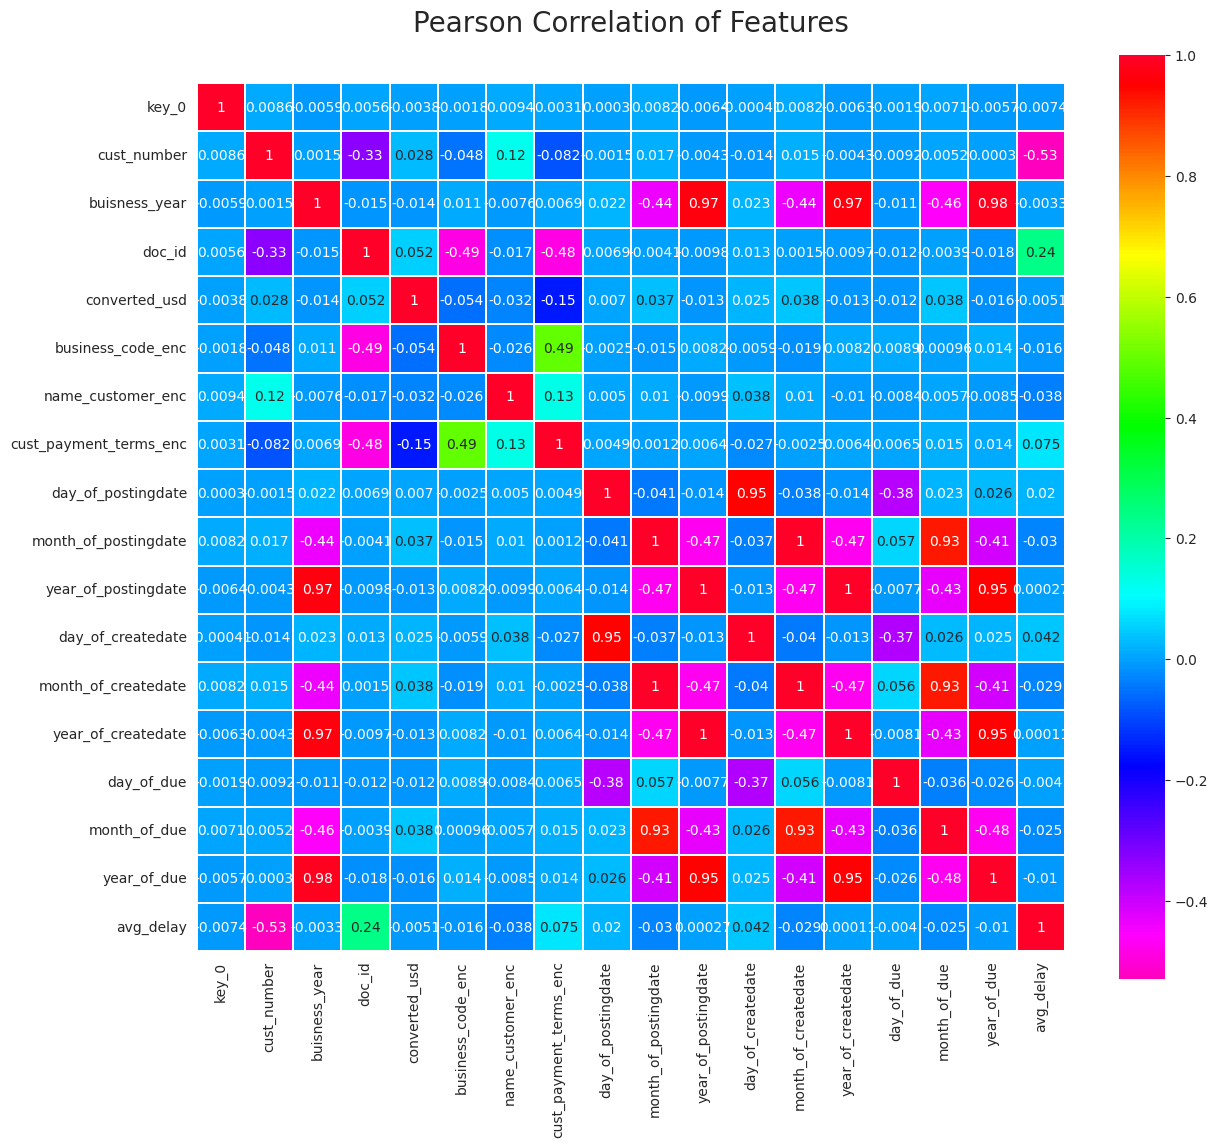

In [88]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train, on=X_train.index).corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [89]:
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [90]:
sel.variances_

array([1.76835773e+15, 1.15226571e-01, 9.02563630e+16, 1.33912212e+09,
       2.91201297e-01, 1.09718960e+06, 1.27394029e+02, 7.56680839e+01,
       1.23393947e+01, 1.15980138e-01, 7.70988929e+01, 1.23545097e+01,
       1.16033386e-01, 7.64774637e+01, 1.21622039e+01, 1.18341787e-01])

### Features columns are
- 'year_of_createdate'
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression

### You need to make different blank list for different evaluation matrix

- MSE
- R2
- Algorithm

In [91]:
MSE_Score = []
R2_Score = []
Algorithm = []

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [92]:
# from sklearn.linear_model import LinearRegression

# Algorithm.append('LinearRegression')
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# predicted = regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [93]:
# MSE_Score.append(mean_squared_error(y_test, predicted))
# R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [94]:
# predict_test = regressor.predict(X_val)
# mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [95]:
# for i in Algorithm, MSE_Score, R2_Score:
#     print(i, end=',')

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [96]:
# from sklearn.svm import SVR

# Algorithm.append('SVR')
# regressor = SVR()
# regressor.fit(X_train, y_train)
# predicted = regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for "y_test" and "predicted" dataset and store those data inside respective list for comparison

In [97]:
# MSE_Score.append(mean_squared_error(y_test, predicted))
# R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [98]:
# predict_test = regressor.predict(X_val)
# mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [99]:
# for i in Algorithm, MSE_Score, R2_Score:
#      print(i, end=',')

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [100]:
# from sklearn.tree import DecisionTreeRegressor

# Algorithm.append('DecisionTreRegressor')
# regressor = DecisionTreeRegressor()
# regressor.fit(X_train, y_train)
# predicted = regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [101]:
# MSE_Score.append(mean_squared_error(y_test, predicted))
# R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [102]:
# predict_test = regressor.predict(X_val)
# mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [103]:
# for i in Algorithm, MSE_Score, R2_Score:
#     print(i, end=',')

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [104]:
# from sklearn.ensemble import RandomForestRegressor

# Algorithm.append('RandomForestRegressor')
# regressor = RandomForestRegressor()
# regressor.fit(X_train, np.ravel(y_train))
# predicted = regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [105]:
# MSE_Score.append(mean_squared_error(y_test, predicted))
# R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [106]:
# predict_test = regressor.predict(X_val)
# mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [107]:
# for i in Algorithm, MSE_Score, R2_Score:
#     print(i, end=',')

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code

In [108]:
import xgboost as xgb

Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the

- Mean Square Error
- R Square Error

for y_test and predicted dataset and store those data inside respective list for comparison

In [109]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also

In [112]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test)

173111001088.0

### Display The Comparison Lists


In [113]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['XGB Regressor'],[159542657024.0],[0.6579189300537109],

## You need to make the comparison list into a comparison dataframe

In [114]:
comp_df = pd.DataFrame(data = {"Algorithm": Algorithm, "MSE_Score": MSE_Score, "R2_Score": R2_Score})
comp_df.head()

,Algorithm,MSE_Score,R2_Score
0,XGB Regressor,1.595427e+11,0.657919


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [115]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [118]:
mean_squared_error(y_test, predictedfinal)

159542657024.0

### Calculate the mean Square Error for validation dataset

In [120]:
mean_squared_error(y_val, predict_testfinal)

173111001088.0

### Calculate the R2 score for test

In [121]:
r2_score(y_test, predictedfinal)

0.6579189300537109

### Calculate the R2 score for Validation

In [122]:
r2_score(y_val, predict_testfinal)

0.5623683929443359

### Calculate the Accuracy for train Dataset

In [123]:
regressorfinal.score(X_train, y_train)

0.9411128759384155

### Calculate the accuracy for validation

In [124]:
regressorfinal.score(X_val, y_val)

0.5623683929443359

### Calculate the accuracy for test

In [125]:
regressorfinal.score(X_test, y_test)

0.6579189300537109

## Specify the reason behind choosing your machine learning model

ANS : The metrics that we used for evaluating the above models in our project was MSE and R2 score respectively, and for a model to be said better than another it has to have a lower MSE and a higher R2 score compared to the other models. Currently we can see in the Comparison dataframe that with XGB method we are achieving 1.039541e+11 MSE and 0.777108 R2 score(on last run), performing the best compared to the other ML models that we worked with before.
Thus it was chosen as the final machine learning model to progress with the project.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding
- Step 2 : Day, Month and Year extraction
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns

### Display the Nulldata

In [126]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


### Check for the number of rows and columns in the nulldata

In [127]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata

In [128]:
print(nulldata.describe(),"\n\n")
print(nulldata.info())

      clear_date  buisness_year        doc_id                   posting_date  \
count          0         9681.0  9.681000e+03                           9681   
mean         NaT         2020.0  2.006165e+09  2020-04-01 02:58:11.788038656   
min          NaT         2020.0  1.930535e+09            2020-02-27 00:00:00   
25%          NaT         2020.0  1.930658e+09            2020-03-16 00:00:00   
50%          NaT         2020.0  1.930731e+09            2020-03-30 00:00:00   
75%          NaT         2020.0  1.930818e+09            2020-04-17 00:00:00   
max          NaT         2020.0  2.960636e+09            2020-05-22 00:00:00   
std          NaN            0.0  2.673629e+08                            NaN   

                         due_in_date           baseline_create_date  \
count                           9681                           9681   
mean   2020-04-17 19:15:09.203594496  2020-04-01 01:57:21.586612992   
min              2020-02-27 00:00:00            2020-02-27 00:00:0

### Storing the Nulldata into a different dataset
# for BACKUP

In [129]:
nulldata1 = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [130]:
from sklearn.preprocessing import LabelEncoder

business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [131]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use -

*   dt.day
*   dt.month
*   dt.year

In [132]:
nulldata["day_of_cleardate"] = [x.day for x in nulldata["clear_date"]]
nulldata["month_of_cleardate"] = [x.month for x in nulldata["clear_date"]]
nulldata["year_of_cleardate"] = [x.year for x in nulldata["clear_date"]]

nulldata["day_of_postingdate"] = [x.day for x in nulldata["posting_date"]]
nulldata["month_of_postingdate"] = [x.month for x in nulldata["posting_date"]]
nulldata["year_of_postingdate"] = [x.year for x in nulldata["posting_date"]]

nulldata["day_of_due"] = [x.day for x in nulldata["due_in_date"]]
nulldata["month_of_due"] = [x.month for x in nulldata["due_in_date"]]
nulldata["year_of_due"] = [x.year for x in nulldata["due_in_date"]]

nulldata["day_of_createdate"] = [x.day for x in nulldata["baseline_create_date"]]
nulldata["month_of_createdate"] = [x.month for x in nulldata["baseline_create_date"]]
nulldata["year_of_createdate"] = [x.year for x in nulldata["baseline_create_date"]]

### Use Label Encoder1 of all the following columns -
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [133]:
nulldata['cust_payment_terms_enc'] = label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc'] = label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc'] = label_encoder.transform(nulldata['name_customer'])

### Check for the datatypes of all the columns of Nulldata

In [134]:
nulldata.dtypes

,0
business_code,object
cust_number,int64
name_customer,object
clear_date,datetime64[ns]
buisness_year,int16
doc_id,float64
posting_date,datetime64[ns]
due_in_date,datetime64[ns]
baseline_create_date,datetime64[ns]
cust_payment_terms,object


### Now you need to drop all the unnecessary columns -

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [135]:
cols = ['business_code', "baseline_create_date", "due_in_date", "posting_date", "name_customer", "clear_date", "cust_payment_terms", "day_of_cleardate", "month_of_cleardate", "year_of_cleardate"]
nulldata.drop(cols, axis=1, inplace=True)

### Check the information of the "nulldata" dataframe

In [136]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   int16  
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null   int6

### Compare "nulldata" with the "X_test" dataframe

- use info() method

In [137]:
print(nulldata.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   int16  
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null   int6

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe
- Display all the columns of the Nulldata dataframe
- Store the Nulldata with new sequence into a new dataframe


- Note - The code is given below, no need to change

In [138]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [139]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [140]:
nulldata2 = nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
                      'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
                      'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
                      'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
                      'day_of_due', 'month_of_due', 'year_of_due']]

In [141]:
##EXTRA
nulldata2.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [142]:
t = {'id': 1, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200769623,
     'name_customer': 'PIO associates', 'clear_date': {'year': 2020, 'month': 2, 'day': 11}, 'business_year': 2020,
     'doc_id': '1930438491', 'posting_date': {'year': 2020, 'month': 1, 'day': 26},
     'document_create_date': {'year': 2020, 'month': 1, 'day': 25},
     'document_create_date1': {'year': 2020, 'month': 1, 'day': 26},
     'due_in_date': {'year': 2020, 'month': 2, 'day': 10}, 'invoice_currency': 'USD',
     'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 54273.28,
     'baseline_create_date': {'year': 2020, 'month': 1, 'day': 26},
     'cust_payment_terms': 'NAH4', 'invoice_id': 1930438491, 'isOpen': 0, 'is_deleted': 0}

t_list = [ {'id': 1, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200769623,
     'name_customer': 'PIO associates', 'clear_date': {'year': 2020, 'month': 2, 'day': 11}, 'business_year': 2020,
     'doc_id': '1930438491', 'posting_date': {'year': 2020, 'month': 1, 'day': 26},
     'document_create_date': {'year': 2020, 'month': 1, 'day': 25},
     'document_create_date1': {'year': 2020, 'month': 1, 'day': 26},
     'due_in_date': {'year': 2020, 'month': 2, 'day': 10}, 'invoice_currency': 'USD',
     'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 54273.28,
     'baseline_create_date': {'year': 2020, 'month': 1, 'day': 26},
     'cust_payment_terms': 'NAH4', 'invoice_id': 1930438491, 'isOpen': 0, 'is_deleted': 0}]


cols = ['cust_number', 'buisness_year', 'doc_id', 'converted_usd','business_code_enc', 'name_customer_enc',
        'cust_payment_terms_enc','day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
        'day_of_createdate', 'month_of_createdate', 'year_of_createdate', 'day_of_due', 'month_of_due', 'year_of_due']


In [143]:
json_data = [{'id': 1, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200769623, 'name_customer': 'PIO associates', 'clear_date': {'year': 2020, 'month': 2, 'day': 11}, 'business_year': 2020, 'doc_id': '1930438491', 'posting_date': {'year': 2020, 'month': 1, 'day': 26}, 'document_create_date': {'year': 2020, 'month': 1, 'day': 25}, 'document_create_date1': {'year': 2020, 'month': 1, 'day':
26}, 'due_in_date': {'year': 2020, 'month': 2, 'day': 10}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 54273.28, 'baseline_create_date': {'year': 2020, 'month': 1, 'day': 26}, 'cust_payment_terms': 'NAH4', 'invoice_id': 1930438491,
'isOpen': 0, 'is_deleted': 0}, {'id': 2, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200980828, 'name_customer': 'SYS systems', 'clear_date': {'year': 2019, 'month': 8, 'day': 8}, 'business_year': 2019, 'doc_id': '1929646410', 'posting_date': {'year': 2019, 'month': 7, 'day': 22}, 'document_create_date': {'year': 2019, 'month': 7, 'day': 22}, 'document_create_date1': {'year': 2019, 'month': 7, 'day': 22}, 'due_in_date': {'year': 2019, 'month': 8, 'day': 11}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 79656.6, 'baseline_create_date': {'year': 2019, 'month': 7, 'day': 22}, 'cust_payment_terms': 'NAD1', 'invoice_id': 1929646410, 'isOpen': 0, 'is_deleted': 0}, {'id': 3, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200792734, 'name_customer': 'SUPERB us', 'clear_date': {'year': 2019, 'month': 12, 'day': 30}, 'business_year': 2019, 'doc_id': '1929873765', 'posting_date': {'year': 2019, 'month': 9, 'day': 14}, 'document_create_date': {'year': 2019, 'month': 9, 'day': 14}, 'document_create_date1': {'year': 2019, 'month': 9, 'day': 14}, 'due_in_date': {'year': 2019, 'month': 9, 'day': 29}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 2253.86, 'baseline_create_date': {'year': 2019, 'month': 9, 'day': 14}, 'cust_payment_terms': 'NAA8', 'invoice_id': 1929873765, 'isOpen': 0, 'is_deleted': 0}, {'id': 4, 'business_code': 'CA02', 'business_name': 'Unilever', 'cust_number': 140105686, 'name_customer': 'SING co', 'business_year': 2020, 'doc_id': '2960623488', 'posting_date': {'year': 2020, 'month': 3, 'day': 30}, 'document_create_date': {'year': 2020, 'month': 3, 'day': 30}, 'document_create_date1': {'year': 2020, 'month': 3, 'day': 30}, 'due_in_date': {'year': 2020, 'month': 4, 'day': 10}, 'invoice_currency': 'CAD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 3299.7, 'baseline_create_date': {'year': 2020, 'month': 3, 'day': 31}, 'cust_payment_terms': 'CA10', 'invoice_id': 2147483647, 'isOpen': 1, 'is_deleted': 0}, {'id': 5, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200769623, 'name_customer': 'PIO associates', 'clear_date': {'year': 2019, 'month': 11, 'day': 25}, 'business_year': 2019, 'doc_id': '1930147974', 'posting_date': {'year': 2019, 'month': 11, 'day': 13}, 'document_create_date': {'year': 2019, 'month': 11, 'day': 13}, 'document_create_date1': {'year': 2019, 'month': 11, 'day': 13}, 'due_in_date': {'year': 2019, 'month': 11, 'day': 28}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 33133.29, 'baseline_create_date': {'year': 2019, 'month': 11, 'day': 13}, 'cust_payment_terms': 'NAH4', 'invoice_id': 1930147974, 'isOpen': 0, 'is_deleted': 0}, {'id': 6, 'business_code': 'CA02', 'business_name': 'Unilever',
'cust_number': 140106181, 'name_customer': 'ITWA in', 'clear_date': {'year': 2019, 'month': 12, 'day': 4}, 'business_year': 2019, 'doc_id': '2960581231', 'posting_date': {'year': 2019, 'month': 9, 'day': 20}, 'document_create_date': {'year': 2019, 'month': 9, 'day': 20}, 'document_create_date1': {'year': 2019, 'month': 9, 'day': 20}, 'due_in_date': {'year': 2019, 'month': 10, 'day': 4}, 'invoice_currency': 'CAD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 22225.84, 'baseline_create_date': {'year': 2019, 'month': 9, 'day': 24}, 'cust_payment_terms': 'CA10', 'invoice_id': 2147483647, 'isOpen': 0, 'is_deleted': 0}, {'id': 7, 'business_code': 'U001', 'business_name':
'Johnson and Johnson', 'cust_number': 200769623, 'name_customer': 'PIO associates', 'clear_date': {'year': 2019, 'month': 11, 'day': 12},
'business_year': 2019, 'doc_id': '1930083373', 'posting_date': {'year': 2019, 'month': 11, 'day': 1}, 'document_create_date': {'year': 2019, 'month': 10, 'day': 31}, 'document_create_date1': {'year': 2019, 'month': 11, 'day': 1}, 'due_in_date': {'year': 2019, 'month': 11, 'day': 16}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 7358.49, 'baseline_create_date': {'year': 2019, 'month': 11, 'day': 1}, 'cust_payment_terms': 'NAH4', 'invoice_id': 1930083373, 'isOpen': 0, 'is_deleted': 0}, {'id': 8, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200744019, 'name_customer': 'KAGO associates', 'business_year': 2020, 'doc_id': '1930659387', 'posting_date': {'year': 2020, 'month': 3, 'day': 19}, 'document_create_date': {'year': 2020, 'month': 3, 'day': 18}, 'document_create_date1': {'year': 2020, 'month': 3, 'day': 19}, 'due_in_date': {'year': 2020, 'month': 4, 'day': 3}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 11173.02, 'baseline_create_date': {'year': 2020, 'month': 3, 'day': 19}, 'cust_payment_terms': 'NAA8', 'invoice_id': 1930659387, 'isOpen': 1, 'is_deleted': 0}, {'id': 9, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200769623, 'name_customer': 'PIO associates', 'clear_date': {'year': 2019, 'month': 6, 'day': 18}, 'business_year': 2019, 'doc_id': '1929439637', 'posting_date': {'year': 2019, 'month': 6, 'day': 7}, 'document_create_date': {'year': 2019, 'month': 6, 'day': 5}, 'document_create_date1': {'year': 2019, 'month': 6, 'day': 7}, 'due_in_date': {'year': 2019, 'month': 6,
'day': 22}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 15995.04, 'baseline_create_date': {'year': 2019, 'month': 6, 'day': 7}, 'cust_payment_terms': 'NAH4', 'invoice_id': 1929439637, 'isOpen': 0, 'is_deleted': 0}, {'id': 10, 'business_code': 'U001', 'business_name': 'Johnson and Johnson', 'cust_number': 200762301, 'name_customer': 'GODL corp', 'clear_date': {'year':
2019, 'month': 3, 'day': 6}, 'business_year': 2019, 'doc_id': '1928819386', 'posting_date': {'year': 2019, 'month': 2, 'day': 20}, 'document_create_date': {'year': 2019, 'month': 2, 'day': 19}, 'document_create_date1': {'year': 2019, 'month': 2, 'day': 20}, 'due_in_date': {'year': 2019, 'month': 3, 'day': 7}, 'invoice_currency': 'USD', 'document_type': 'RV', 'posting_id': 1, 'total_open_amount': 28.63, 'baseline_create_date': {'year': 2019, 'month': 2, 'day': 20}, 'cust_payment_terms': 'NAC6', 'invoice_id': 1928819386, 'isOpen': 0, 'is_deleted':
0}]

In [144]:
xgb.__version__

'3.1.1'

In [145]:
def add_missing(row):
    temp = row
    temp["buisness_year"] = row["business_year"]
    if temp["invoice_currency"] == "CAD":
        temp["converted_usd"] = row["total_open_amount"]*0.7
    else:
         temp["converted_usd"] = row["total_open_amount"]*0.7
    temp["day_of_postingdate"] = row["posting_date"]["day"]
    temp["month_of_postingdate"] = row["posting_date"]["month"]
    temp["year_of_postingdate"] = row["posting_date"]["year"]

    temp["day_of_createdate"] = row["document_create_date"]["day"]
    temp["month_of_createdate"] = row["document_create_date"]["month"]
    temp["year_of_createdate"] = row["document_create_date"]["year"]

    temp["day_of_due"] = row["due_in_date"]["day"]
    temp["month_of_due"] = row["due_in_date"]["month"]
    temp["year_of_due"] = row["due_in_date"]["year"]

    return temp

In [146]:
name_encoder = label_encoder
business_ecoder = business_coder
cust_payment_terms_encoder = label_encoder1

In [147]:
def return_df(rows):
    for row in rows:
        row = add_missing(row)
    df = pd.DataFrame(rows)
    df['cust_payment_terms_enc'] = label_encoder1.transform(df['cust_payment_terms'])
    df['business_code_enc'] = business_coder.transform(df['business_code'])
    df['name_customer_enc'] = label_encoder.transform(df['name_customer'])
    df = df[cols]
    return df

In [148]:
json_df = return_df(json_data)

In [149]:
json_df

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
0,200769623,2020,1930438491,37991.296,1,2948,32,26,1,2020,25,1,2020,10,2,2020
1,200980828,2019,1929646410,55759.620,1,2948,26,22,7,2019,22,7,2019,11,8,2019
2,200792734,2019,1929873765,1577.702,1,2948,18,14,9,2019,14,9,2019,29,9,2019
3,140105686,2020,2960623488,2309.790,0,2948,4,30,3,2020,30,3,2020,10,4,2020
4,200769623,2019,1930147974,23193.303,1,2948,32,13,11,2019,13,11,2019,28,11,2019
5,140106181,2019,2960581231,15558.088,0,2948,4,20,9,2019,20,9,2019,4,10,2019
6,200769623,2019,1930083373,5150.943,1,2948,32,1,11,2019,31,10,2019,16,11,2019
7,200744019,2020,1930659387,7821.114,1,2948,18,19,3,2020,18,3,2020,3,4,2020
8,200769623,2019,1929439637,11196.528,1,2948,32,7,6,2019,5,6,2019,22,6,2019
9,200762301,2019,1928819386,20.041,1,1102,24,20,2,2019,19,2,2019,7,3,2019


In [150]:
json_df['doc_id'] = pd.to_numeric(df['doc_id'])

In [151]:
json_df

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
0,200769623,2020,1.930438e+09,37991.296,1,2948,32,26,1,2020,25,1,2020,10,2,2020
1,200980828,2019,1.929646e+09,55759.620,1,2948,26,22,7,2019,22,7,2019,11,8,2019
2,200792734,2019,1.929874e+09,1577.702,1,2948,18,14,9,2019,14,9,2019,29,9,2019
3,140105686,2020,2.960623e+09,2309.790,0,2948,4,30,3,2020,30,3,2020,10,4,2020
4,200769623,2019,1.930148e+09,23193.303,1,2948,32,13,11,2019,13,11,2019,28,11,2019
5,140106181,2019,2.960581e+09,15558.088,0,2948,4,20,9,2019,20,9,2019,4,10,2019
6,200769623,2019,1.930083e+09,5150.943,1,2948,32,1,11,2019,31,10,2019,16,11,2019
7,200744019,2020,1.930659e+09,7821.114,1,2948,18,19,3,2020,18,3,2020,3,4,2020
8,200769623,2019,1.929440e+09,11196.528,1,2948,32,7,6,2019,5,6,2019,22,6,2019
9,200762301,2019,1.928819e+09,20.041,1,1102,24,20,2,2019,19,2,2019,7,3,2019


In [152]:
print(json_df.dtypes)

cust_number                 int64
buisness_year               int64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object


In [153]:
regressorfinal.predict(json_df)

array([-222724.55 ,   63612.453,  111509.43 , 1022838.6  , -206313.9  ,
        777497.1  , -352381.06 ,  -33804.17 , -216669.28 ,  176400.89 ],
      dtype=float32)

In [154]:
total_dump = (name_encoder, business_ecoder, cust_payment_terms_encoder, regressorfinal)
with open("pickle_save_files.pkl","wb") as f:
    pickle.dump(total_dump,f)

In [155]:
pickle_files = pickle.load(open("pickle_save_files.pkl", "rb"))
name_encoder, business_ecoder, cust_payment_terms_encoder, model = pickle_files

### Display the Final Dataset

In [156]:
nulldata2.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2.960623e+09,2309.79,63,2731,4,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1.930659e+09,11173.02,63,2815,18,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1.930611e+09,3525.59,63,90,18,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020,1.930788e+09,121105.65,63,2041,18,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1.930817e+09,3726.06,63,723,34,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [157]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [158]:
final_result = pd.Series(final_result, name='avg_delay')

### Display the "avg_delay" column

In [159]:
final_result

,avg_delay
0,1.054694e+06
1,7.671162e+05
2,-1.153473e+05
3,3.687588e+05
4,-3.320444e+05
...,...
9676,1.886565e+05
9677,-1.761268e+05
9678,-3.358417e+04
9679,1.749187e+05


### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [160]:
nulldata1.reset_index(drop=True, inplace=True)
Final = nulldata1.merge(final_result, on=nulldata.index)

### Display the "Final" dataframe

In [161]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,1.054694e+06
1,7,U001,0200744019,TARG us,NaT,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,7.671162e+05
2,10,U001,0200418007,AM,NaT,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,-1.153473e+05
3,14,U001,0200739534,OK systems,NaT,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,3.687588e+05
4,15,U001,0200353024,DECA corporation,NaT,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-3.320444e+05


### Check for the Number of Rows and Columns in your "Final" dataframe

In [162]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change

In [163]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [164]:
Final['clear_date']

,clear_date
0,2020-04-22 04:58:14.375000000
1,2020-04-11 21:05:16.250000000
2,2020-03-24 15:57:32.726562500
3,2020-05-04 06:25:58.843750000
4,2020-04-22 03:45:55.562500000
...,...
9676,2020-03-27 04:24:16.546875000
9677,2020-05-15 23:04:33.218750000
9678,2020-03-25 14:40:15.828125000
9679,2020-04-11 00:35:18.718750000


### Convert the average delay into number of days format

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change

In [165]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay // (24 * 3600), axis=1)

### Display the "avg_delay" column

In [166]:
Final['avg_delay']

,avg_delay
0,12.0
1,8.0
2,-2.0
3,4.0
4,-4.0
...,...
9676,2.0
9677,-3.0
9678,-1.0
9679,2.0


### Now you need to convert average delay column into bucket

- Need to perform binning
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [167]:
bins = [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [168]:
Final.drop(['key_0',"avg_delay"], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column

In [169]:
Final['Aging Bucket'].value_counts()

,count
Aging Bucket,
0-15,6666
16-30,213
31-45,68
46-60,33
Greatar than 60,7


### Display your final dataset with aging buckets

In [170]:
Final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-22 04:58:14.375000000,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-11 21:05:16.250000000,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-03-24 15:57:32.726562500,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,NaN
3,U001,0200739534,OK systems,2020-05-04 06:25:58.843750000,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-22 03:45:55.562500000,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN


### Store this dataframe into the .csv format

In [171]:
Final.to_csv("SAGNIK_GHOSH.csv", index=False)

# END OF THE PROJECT